In [5]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# load the log from get_head
log_ = pd.read_csv('log_get_head.csv',sep=';') # load the ;-separated log 

In [9]:
# inspect data
log_.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error,dt
0,0,urls_get,requests,1.598360e+09,-0.254478,https://ekstrabladet.dk/sport/haandbold/dansk-...,https://ekstrabladet.dk/sport/haandbold/dansk-...,571829,200,True,NaN,2020-08-25 12:51:53.552069426
1,1,urls_get,requests,1.598360e+09,-0.374778,https://ekstrabladet.dk/sport/anden_sport/boks...,https://ekstrabladet.dk/sport/anden_sport/boks...,575361,200,True,NaN,2020-08-25 12:51:56.961597443
2,2,urls_get,requests,1.598360e+09,-0.438349,https://ekstrabladet.dk/flash/udlandkendte/jou...,https://ekstrabladet.dk/flash/udlandkendte/jou...,576386,200,True,NaN,2020-08-25 12:51:59.501486540
3,3,urls_get,requests,1.598360e+09,-0.397937,https://ekstrabladet.dk/nyheder/politik/danskp...,https://ekstrabladet.dk/nyheder/politik/danskp...,596363,200,True,NaN,2020-08-25 12:52:01.700657129
4,4,urls_get,requests,1.598360e+09,-0.471427,https://ekstrabladet.dk/nyheder/politik/histor...,https://ekstrabladet.dk/nyheder/politik/histor...,565879,200,True,NaN,2020-08-25 12:52:06.312077284


In [11]:
log_['dt'] = pd.to_datetime(log_.t,unit='s')
dt = log_.dt.values[0]

Text(0.5, 0, 'Scraping progress')

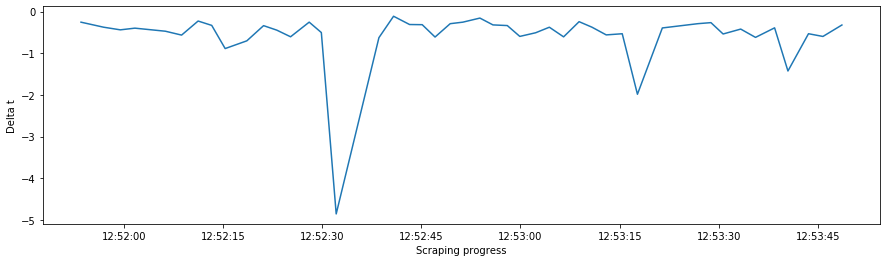

In [13]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_.dt,log_.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

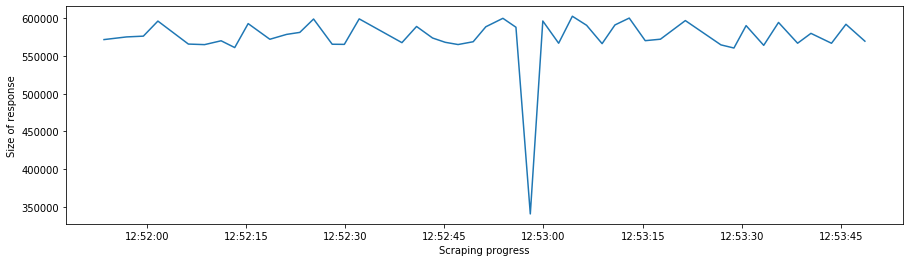

In [15]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_.dt,log_.response_size)

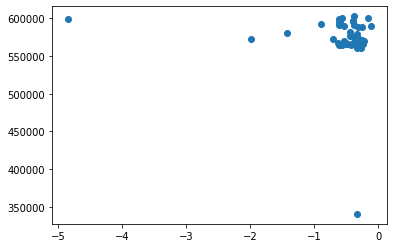

In [17]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_.delta_t,log_.response_size)

In [18]:
## Investigate errors
log_.success.value_counts() ## Count errors
## Groupby time
# round the time for aggregation
log_['dt_minute'] = log_.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_['dt_hour'] = log_.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
log_.groupby('dt_hour').success.mean()


dt_hour
2020-08-25 12:00:00.000000027    True
2020-08-25 12:00:00.000000099    True
2020-08-25 12:00:00.000000125    True
2020-08-25 12:00:00.000000129    True
2020-08-25 12:00:00.000000132    True
2020-08-25 12:00:00.000000151    True
2020-08-25 12:00:00.000000178    True
2020-08-25 12:00:00.000000207    True
2020-08-25 12:00:00.000000209    True
2020-08-25 12:00:00.000000215    True
2020-08-25 12:00:00.000000228    True
2020-08-25 12:00:00.000000229    True
2020-08-25 12:00:00.000000264    True
2020-08-25 12:00:00.000000271    True
2020-08-25 12:00:00.000000284    True
2020-08-25 12:00:00.000000288    True
2020-08-25 12:00:00.000000331    True
2020-08-25 12:00:00.000000369    True
2020-08-25 12:00:00.000000402    True
2020-08-25 12:00:00.000000419    True
2020-08-25 12:00:00.000000422    True
2020-08-25 12:00:00.000000426    True
2020-08-25 12:00:00.000000443    True
2020-08-25 12:00:00.000000450    True
2020-08-25 12:00:00.000000452    True
2020-08-25 12:00:00.000000453    True
2020